Use Breast Cancer Dataset and perform the following:

a) Implement Pre-processing functions

- check for NULL values in the dataset. If any NULL value is present then treat it accordingly.

- extract only feature columns from the dataset.

b) Apply Principal component analysis and extract 2 principal components from the dataset. 

c) Visualize the PCA components of the dataset.


In [1]:
#importing breast cancer dataset
import pandas as pd 
import matplotlib.pyplot as plt 
df=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Breast_Cancer_Dataset.csv') 

In [2]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#checking for NULL values
df.isnull().sum().sort_values(ascending=False)

Unnamed: 32                569
area_se                      0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
smoothness_se                0
fractal_dimension_worst      0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
id      

In [4]:
#dropping columns
df=df.drop(columns=['Unnamed: 32','id']) 

In [5]:
#extracting features from the dataset
df1=df.iloc[:,2:].values 

In [6]:
#standardizing the features
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler() 
df_scaled=ss.fit_transform(df1)

In [7]:
#applying pca on the dataset
from sklearn.decomposition import PCA 
pca=PCA(n_components=2) 
components=pca.fit_transform(df_scaled) 
principalDf=pd.DataFrame(data=components,columns=['principalcomponent_1','principalcomponent_2']) 
finalDf=pd.concat([principalDf,df['diagnosis']],axis=1) 

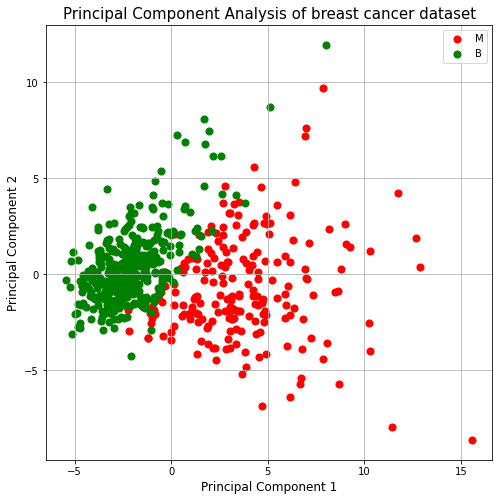

In [8]:
#visualizing pca components
fig=plt.figure(figsize=(8,8))  
ax=fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize=12) 
ax.set_ylabel('Principal Component 2', fontsize=12) 
ax.set_title("Principal Component Analysis of breast cancer dataset", fontsize=15) 
classes=['M','B'] 
colors=['r','g']
for target, color in zip(classes,colors): 
 indices=finalDf['diagnosis']==target 
 ax.scatter(finalDf.loc[indices,'principalcomponent_1'],finalDf.loc[indices,'principalcomponent_2'],c=color,s=50) 
ax.legend(classes) 
ax.grid()